In [2]:
pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl (332.0 MB)
   ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/4.7 MB 12.7 MB/s eta 0:00:01
   ----

In [123]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import tensorflow.keras as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [124]:
# DATA EXPLORATION

# Import data
data = pd.read_csv("Churn.csv")
# First 5 rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [125]:
# Last 5 rows
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [127]:
# Data shape
data.shape

(7043, 21)

In [128]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [129]:
# DATA PREPROCESSING

# Detelete non-useful data
data = data.drop(["customerID"], axis = 1)

# Feature engineering
convert_columns=["gender","OnlineBackup",  "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",
                 "OnlineSecurity", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                 "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]
data = pd.get_dummies(data, columns=convert_columns, drop_first=True)


data.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,OnlineBackup_No internet service,OnlineBackup_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,False,True,True,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.5,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,True,False,False,True,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,False,False,True,...,False,False,False,False,False,True,False,True,False,True


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   object 
 4   gender_Male                            7043 non-null   bool   
 5   OnlineBackup_No internet service       7043 non-null   bool   
 6   OnlineBackup_Yes                       7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [131]:
# Transforming the TotalCharges column because it has the string ' ' whenever there is not a value
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   bool   
 5   OnlineBackup_No internet service       7043 non-null   bool   
 6   OnlineBackup_Yes                       7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [133]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


C:\Users\ponch\AppData\Local\Temp\ipykernel_29528\2540593756.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

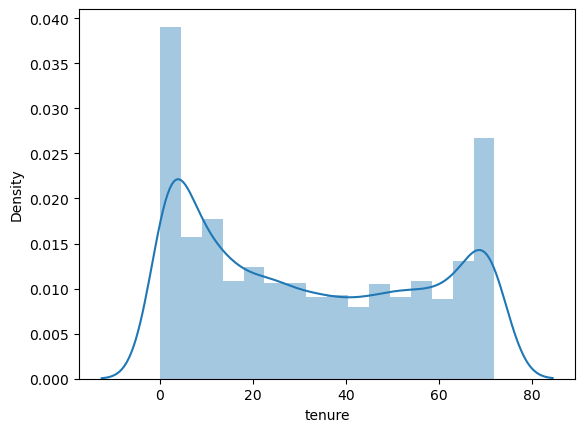

In [134]:
sns.distplot(data['tenure'])

C:\Users\ponch\AppData\Local\Temp\ipykernel_29528\2227747664.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MonthlyCharges'])


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

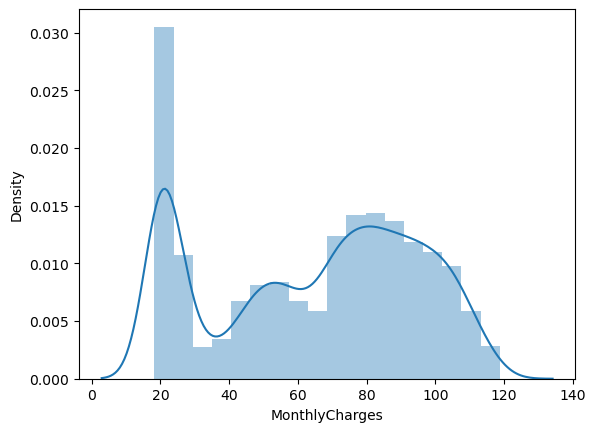

In [135]:

sns.distplot(data['MonthlyCharges'])

C:\Users\ponch\AppData\Local\Temp\ipykernel_29528\1028203397.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TotalCharges'])


<Axes: xlabel='TotalCharges', ylabel='Density'>

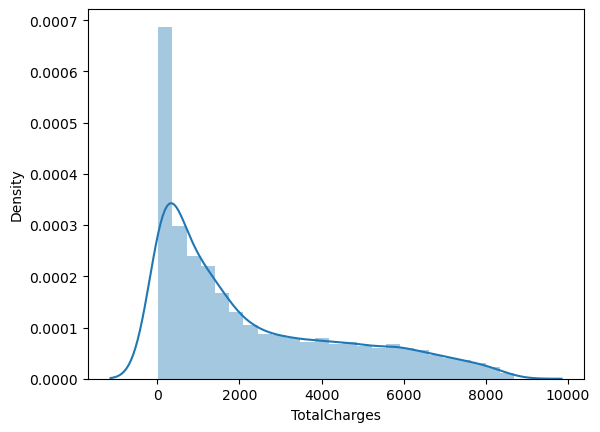

In [136]:
sns.distplot(data['TotalCharges'])

In [137]:
from sklearn.preprocessing import StandardScaler
# Split into independant and dependant variable
y = data['Churn_Yes']
X = data.drop(['Churn_Yes'],axis=1)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [138]:
X

array([[-0.43991649, -1.27744458, -1.16032292, ..., -0.52504733,
         1.40641839, -0.54480692],
       [-0.43991649,  0.06632742, -0.25962894, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-0.43991649, -1.23672422, -0.36266036, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [-0.43991649, -0.87024095, -1.1686319 , ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 2.27315869, -1.15528349,  0.32033821, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-0.43991649,  1.36937906,  1.35896134, ..., -0.52504733,
        -0.71102597, -0.54480692]])

In [139]:
from sklearn.model_selection import train_test_split
# MODELING

# Create the train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [141]:
model = tf.models.Sequential()
### add the layers
model.add(tf.layers.Dense(16,input_dim=30,activation='relu'))
model.add(tf.layers.Dense(32,activation='relu'))
model.add(tf.layers.Dense(1,activation="sigmoid"))
## compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

C:\Users\ponch\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7424 - loss: 0.5108 - val_accuracy: 0.7986 - val_loss: 0.4577
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7903 - loss: 0.4389 - val_accuracy: 0.8101 - val_loss: 0.4430
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7925 - loss: 0.4267 - val_accuracy: 0.8092 - val_loss: 0.4358
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7974 - loss: 0.4197 - val_accuracy: 0.8163 - val_loss: 0.4330
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7985 - loss: 0.4155 - val_accuracy: 0.8128 - val_loss: 0.4318
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8010 - loss: 0.4119 - val_accuracy: 0.8066 - val_loss: 0.4315
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8045 - loss: 0.4095 - val_accuracy: 0.8110 - val_loss: 0.4302
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8028 - loss: 0.4076 - val_accuracy: 0.8163 - 

In [143]:
# Prediction

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [144]:
from sklearn.metrics import accuracy_score
# MODEL EVALUATION

# Accuracy
accuracy_score(y_test, y_pred)


0.7125621007806955

<Axes: >

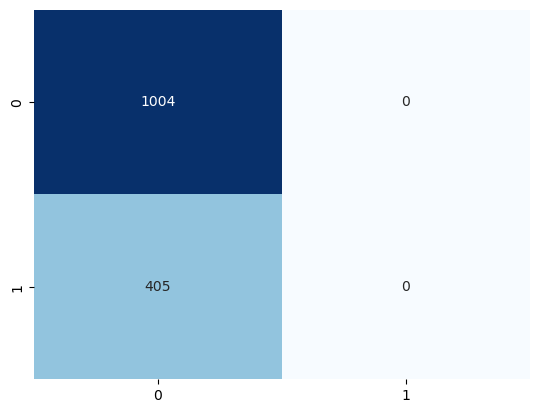

In [145]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [146]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

       False       0.71      1.00      0.83      1004
        True       0.00      0.00      0.00       405

    accuracy                           0.71      1409
   macro avg       0.36      0.50      0.42      1409
weighted avg       0.51      0.71      0.59      1409



C:\Users\ponch\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ponch\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ponch\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# We can see that the model strugles a lot when clasifying negative values since we had 0 correcly classified True negatives